In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

#### Load CSV files

In [2]:
covid_df = pd.read_csv('COVID_CountByZipPerDate 03292021.csv')
vaccine_df = pd.read_csv('vaccine_with_protocol.csv')

#### Convert Values

In [3]:
covid_df.Zip = covid_df.Zip.astype('Int64')
vaccine_df.zipcode = vaccine_df.zipcode.astype('Int64')
vaccine_df.count_given = vaccine_df.count_given.astype('float')
vaccine_df.dose_nbr = vaccine_df.dose_nbr.astype('Int64')

In [4]:
covid_df.Zip = covid_df.Zip.astype('str')
vaccine_df.zipcode = vaccine_df.zipcode.astype('str')

#### Rename Columns

In [5]:
covid_df.columns = ['date', 'zip', 'cases']
vaccine_df.columns = ['date', 'zip', 'v_count', 'dose_nbr', 'protocol']

#### Convert DateTime

In [6]:
covid_df.date = pd.to_datetime(covid_df.date)
vaccine_df.date = pd.to_datetime(vaccine_df.date)

#### Group Total Covid and Total Vaccine Count By Zip

#group by zipcode to get total cases per zipcode
df2 = C_count.groupby(['Zip'],as_index=False)['Cases'].sum()
df2

In [7]:
covid_df_g = covid_df.groupby(['zip'], as_index=False)['cases'].sum()
vaccine_df_g = vaccine_df.groupby(['zip'], as_index=False)['v_count'].sum()

In [8]:
# covid_df_g

#### Create Month_Year Column

In [9]:
vaccine_df2 = vaccine_df
covid_df2 = covid_df

In [10]:
vaccine_df2['month'] = vaccine_df2['date'].dt.month
vaccine_df2['year'] = vaccine_df2['date'].dt.year
covid_df2['month'] = covid_df2['date'].dt.month
covid_df2['year'] = covid_df2['date'].dt.year

In [11]:
vaccine_df2['month_year'] = vaccine_df2['month'].map(str) + '-' + vaccine_df2['year'].map(str)
covid_df2['month_year'] = covid_df2['month'].map(str) + '-' + covid_df2['year'].map(str)

In [12]:
covid_df = covid_df[['zip', 'month_year', 'cases']]
vaccine_df = vaccine_df[['month_year', 'zip', 'v_count', 'dose_nbr', 'protocol']]

In [13]:
v_my_g = vaccine_df2.groupby(['zip'])
c_my_g = covid_df2.groupby(['zip'])

#### Load Household Income

Read in Excel file and then skip the first row which is a title in the excel file
Skip rows allows that. We are then pulling in two headers since this excel has Zip and 'Value & Error'
We can choose different excel sheets Sheet_name = 0 is actual data and Sheet_name =1 is the second percentage

In [14]:
income_df = pd.read_excel("household_income.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
income_df = income_df[income_df.columns.drop(list(income_df.filter(regex='Error')))]
income_df.columns = income_df.columns.droplevel(1)

In [15]:
income_clean=income_df.set_index('Unnamed: 0_level_0').T.reset_index().rename({'index' : 'zip'}, axis=1)
# income_clean.info()

#### Load Sex_Age Data

In [16]:
sex_age_df = pd.read_excel("sex_by_age.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
sex_age_df = sex_age_df[sex_age_df.columns.drop(list(sex_age_df.filter(regex='Error')))]
sex_age_df.columns = sex_age_df.columns.droplevel(1)

In [17]:
sex_age_clean = sex_age_df.set_index('Unnamed: 0_level_0').T.reset_index().rename({'index' : 'zip'}, axis=1)
# sex_age_clean

In [18]:
# sex_age_df.set_index('Unnamed: 0_level_0').T.reset_index()

#### Load Ethnicity Data

In [19]:
ethnicity_df = pd.read_excel("ethnicity.xlsx", skiprows = 1, header=[0,1], sheet_name=0)
ethnicity_df = ethnicity_df[ethnicity_df.columns.drop(list(ethnicity_df.filter(regex='Error')))]
ethnicity_df.columns = ethnicity_df.columns.droplevel(1)

In [35]:
ethnicity_df_clean = ethnicity_df.set_index('Unnamed: 0_level_0').T.reset_index().rename({'index' : 'zip'}, axis=1)

In [34]:
# ethnicity_df_clean.nunique(axis=0)

In [51]:
pop_by_zip = ethnicity_df_clean[['zip', 'Total:']]
pop_by_zip.rename(columns={'Total:': 'total'})

Unnamed: 0_level_0,zip,total
0,37010,4966
1,37012,2185
2,37013,97939
3,37014,2835
4,37015,17665
...,...,...
113,38552,157
114,38560,1405
115,38563,3410
116,38567,685


#### Load geospatial zips

In [22]:
zipcodes = gpd.read_file('zipcodes.geojson')
print(zipcodes.crs)
# zipcodes

epsg:4326


#### Merge Grouped DataFrames With Zips


In [23]:
vac_zip = zipcodes.merge(vaccine_df_g, how="inner", left_on='zip', right_on='zip')

In [24]:
covid_zip = zipcodes.merge(covid_df_g, how="inner", left_on='zip', right_on='zip')

In [25]:
# vac_zip

In [26]:
# covid_zip

In [27]:
vac_zip = vac_zip[['zip', 'shape_stlength', 'shape_starea', 'geometry', 'v_count']]

In [28]:
covid_zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   zip             42 non-null     object  
 1   objectid        42 non-null     object  
 2   po_name         42 non-null     object  
 3   shape_stlength  42 non-null     object  
 4   shape_starea    42 non-null     object  
 5   geometry        42 non-null     geometry
 6   cases           42 non-null     int64   
dtypes: geometry(1), int64(1), object(5)
memory usage: 2.6+ KB


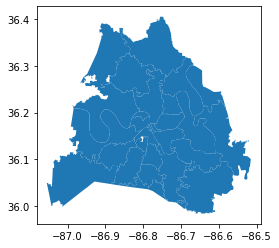

In [29]:
covid_zip.plot();

In [30]:
# vac_zip.plot();

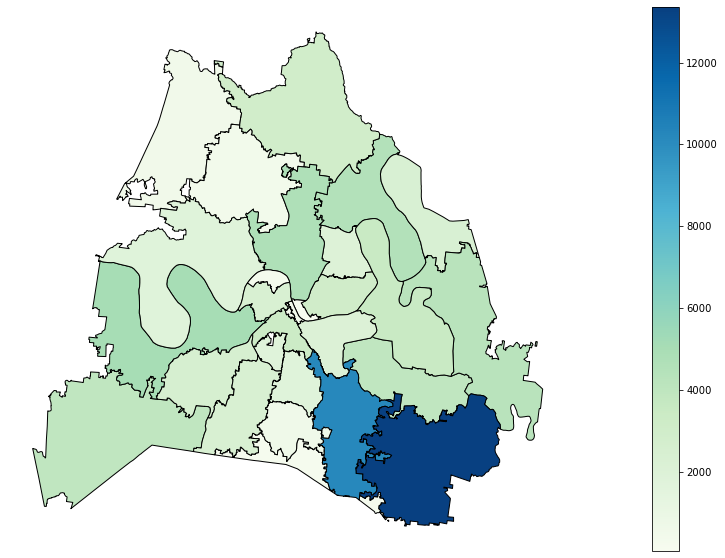

In [31]:
fig, ax = plt.subplots(figsize=(30,10))
covid_zip.plot(column = 'cases',
             cmap = 'GnBu', 
             edgecolor = 'black',
             ax = ax, 
             legend=True)
ax.axis('off');

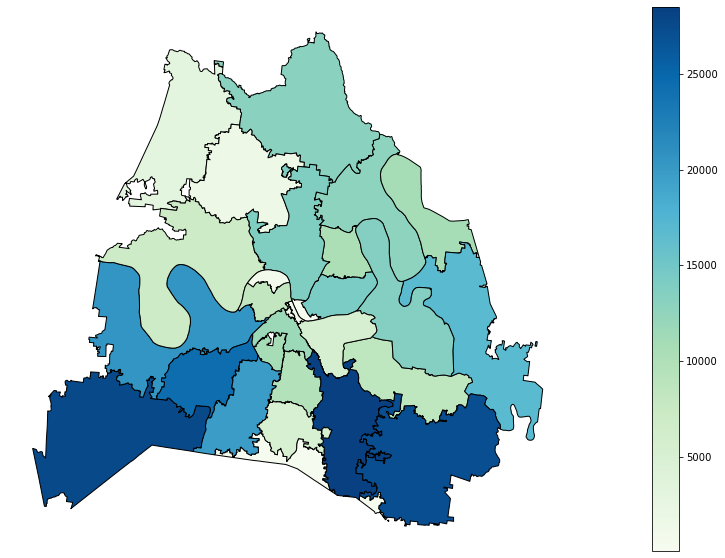

In [32]:
fig, ax = plt.subplots(figsize=(30,10))
vac_zip.plot(column = 'v_count',
             cmap = 'GnBu', 
             edgecolor = 'black',
             ax = ax, 
             legend=True)
ax.axis('off');

*** Explore sum in group by ***

In [33]:
covid_df_my = pd.to_datetime(covid_df_my.month_year)

NameError: name 'covid_df_my' is not defined

In [ ]:
# covid_df_my = covid_df_my.sort_values(['zip', 'month_year'])

In [ ]:
print(covid_df_my.head(20))

In [ ]:
# plt.scatterplt('')

In [ ]:
c_my_g.describe()

In [ ]:
plt.bar('month_year', 'cases', data = covid_df_my)
plt.ylim(0, 300)
plt.xticks(rotation = 70)
plt.title('');

In [ ]:
v_my_g.describe()

In [ ]:
c_my_g.describe()

In [ ]:
vaccine_df_by_zip = vaccine_df.groupby('zip')
covid_df_by_zip = covid_df.groupby('zip')

In [ ]:
vaccine_df_by_date = vaccine_df.groupby('date')
covid_df_by_zip_date = covid_df.groupby('date')

In [ ]:
vaccine_df_by_date['month'] = vaccine_df_by_date['date'].dt.month

In [ ]:
vaccine_df.info()

In [ ]:
covid_df_by_zip.describe()

In [ ]:
vaccine_df_by_date.describe()

### Reading Metadata function. From Joshua Rio-Ross
#### Basically, each table’s metadata.json is a dictionary with subdictionaries (as I’m sure you already saw), so I wrote a function that drills down to the right depth and gets each column name and stores it in a list in order, then finally it uses that list to rename the columns in the geodataframe/dataframe.
##### One important thing: The tablename is the Census Reporter name that you see in the top left part of the page and that’s at the beginning of all the column names. So it’s a string that’s something like “B09001” or whatever.

In [ ]:
def metarename(file, metadata, tablename):
    """Given a Census Reporter file and its metadata, rename all imported DataFrame columns."""
    name_list = ["geoid", "zip"]
    for i in metadata["tables"][tablename]["columns"].items():
        col_name = i[1]["name"]
        col_name_error = i[1]["name"]+" error"
        name_list.append(col_name)
        name_list.append(col_name_error)
    name_list.append("geometry")
    file.columns = name_list
    return file

# Read in GeoDataFrame from geojson
eth_geo_df = gpd.read_file('../data/ethnicity_geojson/ehtnicity_geo.geojson')
# Read in metadata DataFrame from json using json package
er_md = open('../data/ethnicity_geojson/metadata.json')
eth_race_meta = json.load(er_md)
# Run function using table name "B03002"
metarename(eth_geo_df, eth_race_meta, "B03002")